In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai import *
from fastai.vision import *

In [14]:
size = 224
bs = 4

In [6]:
dataDir = "/home/tako/devtools/furry-geras/coco"
dataType = "val2017"
annFile = "{}/instances_{}.json".format(dataDir, dataType)

images, lbl_bbox = get_annotations(annFile)
img2bbox = dict(zip(images, lbl_bbox))

get_y_func = lambda o:img2bbox[o.name]
        

In [8]:
get_y_func(Path("coco/val2017/000000140286.jpg"))

[[[249.08, 96.54, 445.64, 269.15000000000003],
  [226.35, 417.67, 328.07, 517.57],
  [265.36, 254.83, 337.95000000000005, 282.93]],
 ['horse', 'person', 'person']]

In [11]:
def get_y_func(o):
    result = [[],[]]
    lbl_bbox = img2bbox[o.name]
    for i, obj in enumerate(lbl_bbox[1]):
        if obj =='person':
            result[1].append(obj)
            result[0].append(lbl_bbox[0][i])
    return result
get_y_func(Path("coco/val2017/000000140286.jpg"))


[[[226.35, 417.67, 328.07, 517.57],
  [265.36, 254.83, 337.95000000000005, 282.93]],
 ['person', 'person']]

In [26]:
def remove_non_human(f):
    classes = get_y_func(f)[1]
    return 'person' in classes
        
data = (ObjectItemList.from_folder('coco')
        .filter_by_func(remove_non_human)
        #Where are the images? -> in coco
        .random_split_by_pct(seed=42)                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func
        .transform(get_transforms(), size=size, tfm_y=True)
        #Data augmentation? -> Standard transforms with tfm_y=True
        .databunch(bs=bs))   
        #Finally we convert to a DataBunch and we use bb_pad_collate

You can deactivate this warning by passing `no_check=True`.


/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/fastai/basic_data.py:236: UserWarning: It's not possible to collate samples of your dataset together in a batch.
  warn(message)


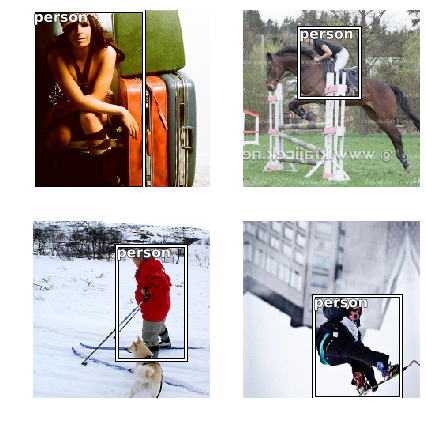

In [27]:
data.show_batch(rows=2, ds_type=DatasetType.Train, figsize=(6,6))

In [30]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [32]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy


RuntimeError: Traceback (most recent call last):
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/fastai/torch_core.py", line 110, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 232, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 232, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 232, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 232, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/tako/devtools/find_human/env-find-human/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 209, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 1 and 5 in dimension 1 at /pytorch/aten/src/TH/generic/THTensorMoreMath.cpp:1333


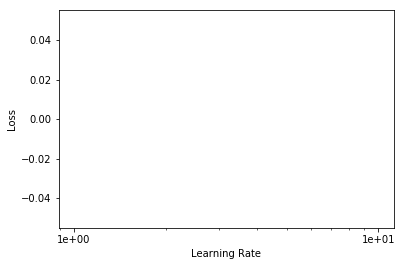